In [18]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

In [19]:
file_path = 'madden_rankings.csv'
madden_data = pd.read_csv(file_path)

filtered_data = madden_data[['Full Name', 'Position', 'Team', 'totalSalary', 'overall_rating']]

filtered_data['normalized_salary'] = np.log(filtered_data[['totalSalary']])

filtered_data['value'] = round(filtered_data['overall_rating'] / filtered_data['normalized_salary'],3)
top3_by_position = filtered_data.groupby('Position').apply(lambda x: x.nlargest(3, 'value')).reset_index(drop=True)

top3_by_position

,Full Name,Position,Team,totalSalary,overall_rating,normalized_salary,value
0,Jason Kelce,C,Eagles,1120000,90,13.928839,6.461
1,Creed Humphrey,C,Chiefs,4160000,86,15.241026,5.643
2,Jon Feliciano,C,Giants,500000,72,13.122363,5.487
3,A.J. Terrell Jr,CB,Falcons,2000000,89,14.508658,6.134
4,Bryce Callahan,CB,Chargers,900000,82,13.710150,5.981
5,Patrick Peterson,CB,Vikings,500000,78,13.122363,5.944
6,Derrick Nnadi,DT,Chiefs,500000,78,13.122363,5.944
7,Matthew Ioannidis,DT,Panthers,500000,78,13.122363,5.944
8,Fletcher Cox,DT,Eagles,3000000,88,14.914123,5.900
9,Andy Janovich,FB,Texans,750000,78,13.527828,5.766


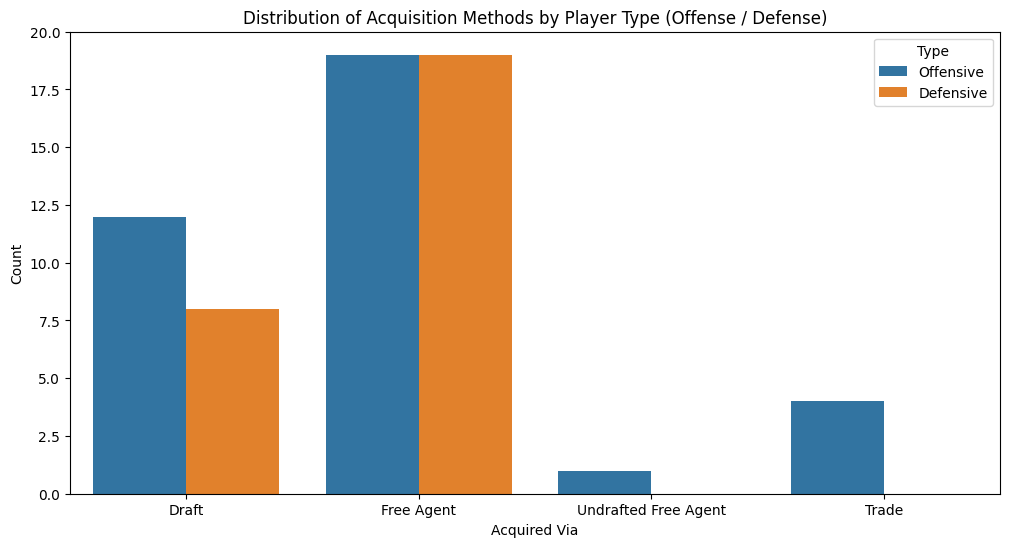

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv('new_file.csv')
df2

position_type_mapping = {
    'C': 'Offensive', 'FB': 'Offensive', 'HB': 'Offensive', 'K': 'Offensive', 
    'LG': 'Offensive', 'LT': 'Offensive', 'P': 'Offensive', 'QB': 'Offensive', 
    'RG': 'Offensive', 'RT': 'Offensive', 'TE': 'Offensive', 'WR': 'Offensive', 
    'CB': 'Defensive', 'DT': 'Defensive', 'FS': 'Defensive', 'LE': 'Defensive', 
    'LOLB': 'Defensive', 'MLB': 'Defensive', 'RE': 'Defensive', 'ROLB': 'Defensive', 
    'SS': 'Defensive'
}

df2['type'] = df2['Position'].map(position_type_mapping)

plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Acquired Via', hue='type')
plt.title('Distribution of Acquisition Methods by Player Type (Offense / Defense)')
plt.ylim(0,20)
plt.xlabel('Acquired Via')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

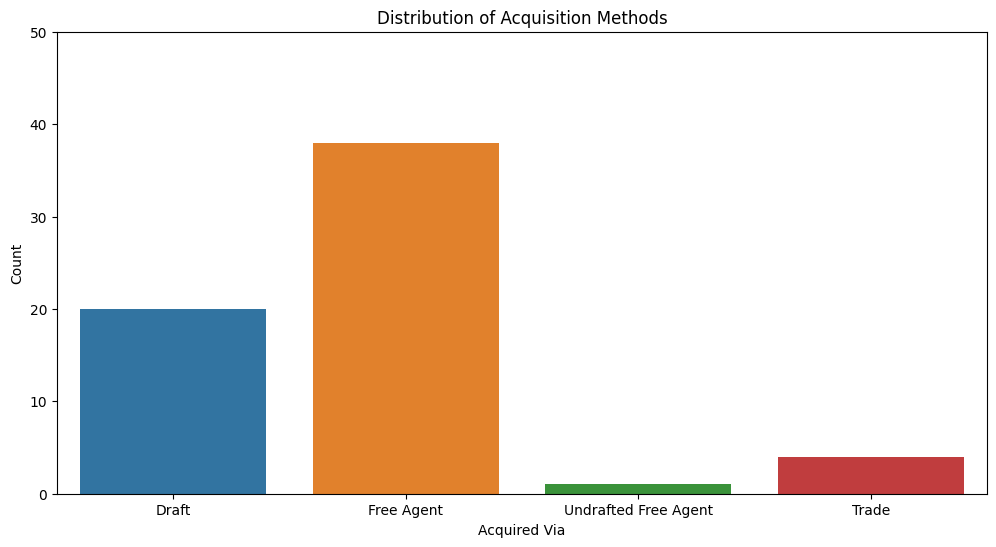

In [23]:
plt.figure(figsize=(12, 6))
plt.ylim(0,50)
sns.countplot(data=df2, x='Acquired Via')
plt.title('Distribution of Acquisition Methods')
plt.xlabel('Acquired Via')
plt.ylabel('Count')
plt.show()

In [24]:
df2['Acquired Via'].value_counts()/len(df2)

Free Agent              0.603175
Draft                   0.317460
Trade                   0.063492
Undrafted Free Agent    0.015873
Name: Acquired Via, dtype: float64